In [4]:
import pandas as pd



In [5]:
df = pd.read_csv("parkinsons.data")
print(df.head())
print(df.shape)


             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [6]:
df['status'].value_counts()


status
1    147
0     48
Name: count, dtype: int64

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
df.isnull().sum()


name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

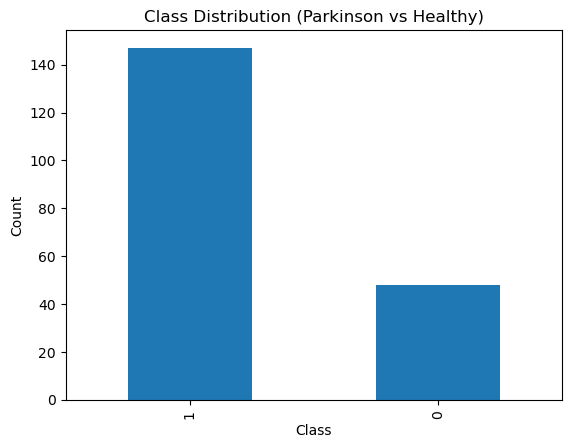

In [9]:
import matplotlib.pyplot as plt

df['status'].value_counts().plot(kind='bar')
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution (Parkinson vs Healthy)")
plt.show()


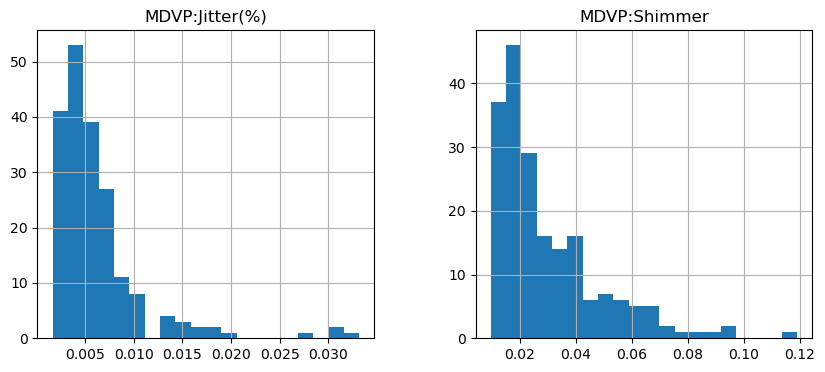

In [10]:
df[['MDVP:Jitter(%)', 'MDVP:Shimmer']].hist(bins=20, figsize=(10,4))
plt.show()


In [11]:
X = df.drop(['name', 'status'], axis=1)
y = df['status']


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [14]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)


SVC(class_weight='balanced', random_state=42)

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = svm_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[10  0]
 [ 8 21]]
              precision    recall  f1-score   support

           0       0.56      1.00      0.71        10
           1       1.00      0.72      0.84        29

    accuracy                           0.79        39
   macro avg       0.78      0.86      0.78        39
weighted avg       0.89      0.79      0.81        39



In [16]:
pip install streamlit


In [17]:
import joblib

joblib.dump(svm_model, "svm_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [18]:
import joblib

feature_names = X.columns.tolist()
joblib.dump(feature_names, "features.pkl")


['features.pkl']